In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy,math
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w, zscore_normalize_features
from lab_utils_common import dlc
import seaborn as sns
from scipy.stats import norm
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [2]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train, rtn_ms=True)


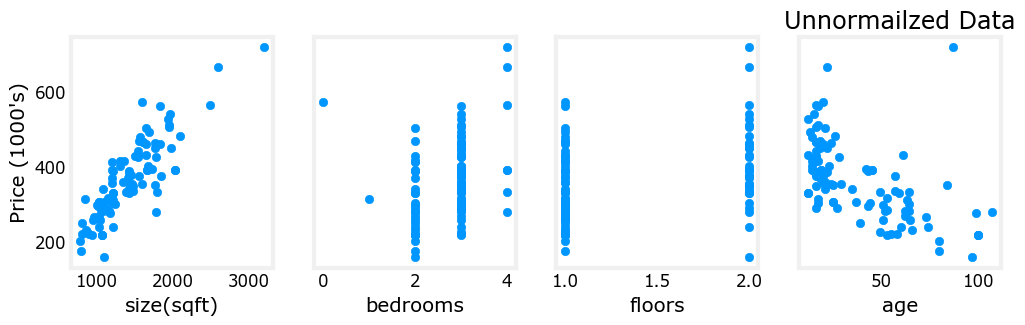

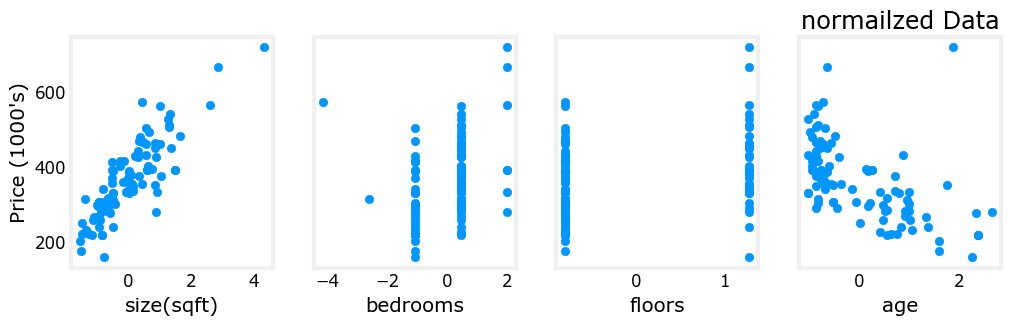

In [3]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
fig.title="Unnormailzed Data"
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.title(fig.title)
plt.show()

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
fig.title="normailzed Data"
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.title(fig.title)
plt.show()

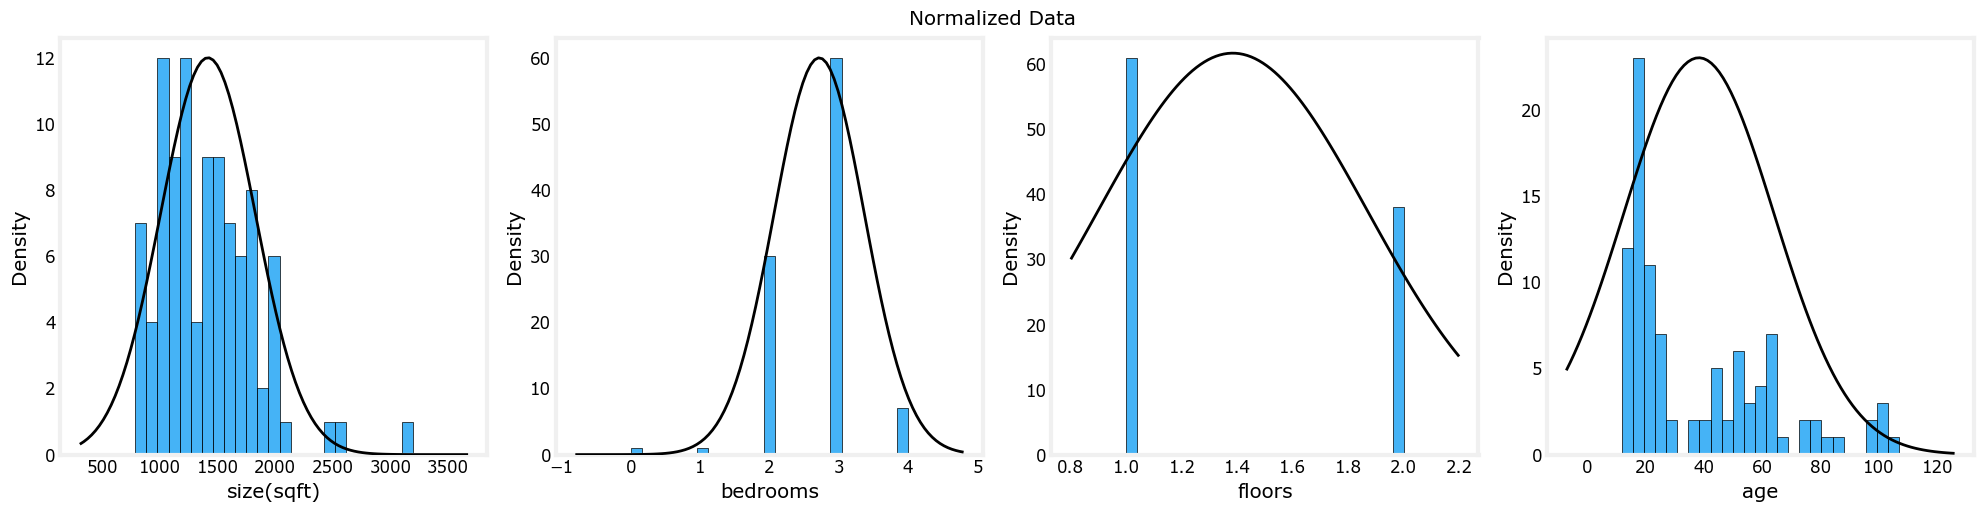

In [4]:
num_features = X_train.shape[1]
fig, axes = plt.subplots(1, num_features, figsize=(20, 5))

for i in range(num_features):
    sns.histplot(X_train[:, i], bins=25,ax=axes[i], color="xkcd:azure", edgecolor='k')
    axes[i].set_xlabel(X_features[i])
    axes[i].set_ylabel('Density')
    
    # Create a secondary y-axis
    axr = axes[i].twinx()
    
    # Calculate the normal distribution
    data = X_train[:, i]
    scale = (np.max(data) - np.min(data)) * 0.2
    x = np.linspace(np.min(data) - scale, np.max(data) + scale, 100)
    mu = np.mean(data)
    std = np.std(data)
    p = norm.pdf(x, mu, std)
    
    # Plot the normal distribution
    axr.plot(x, p, 'k', lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

plt.tight_layout()
fig.suptitle("Normalized Data", y=1.02)
plt.show()

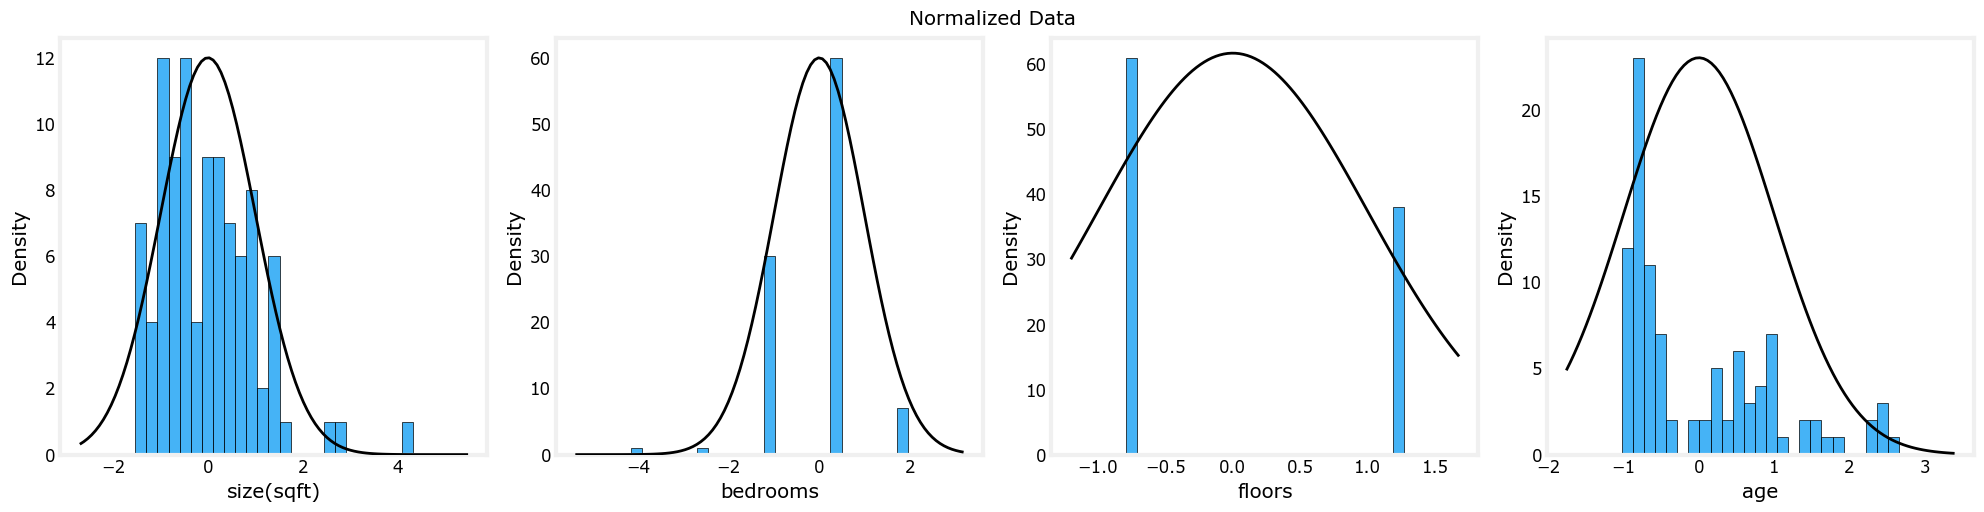

In [5]:
num_features = X_norm.shape[1]
fig, axes = plt.subplots(1, num_features, figsize=(20, 5))

for i in range(num_features):
    sns.histplot(X_norm[:, i], bins=25,ax=axes[i], color="xkcd:azure", edgecolor='k')
    axes[i].set_xlabel(X_features[i])
    axes[i].set_ylabel('Density')
    
    # Create a secondary y-axis
    axr = axes[i].twinx()
    
    # Calculate the normal distribution
    data = X_norm[:, i]
    scale = (np.max(data) - np.min(data)) * 0.2
    x = np.linspace(np.min(data) - scale, np.max(data) + scale, 100)
    mu = np.mean(data)
    std = np.std(data)
    p = norm.pdf(x, mu, std)
    
    # Plot the normal distribution
    axr.plot(x, p, 'k', lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

plt.tight_layout()
fig.suptitle("Normalized Data", y=1.02)
plt.show()

In [6]:
def predict(x, w, b):
    return np.dot(x, w) + b

In [7]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    cost = 0.0
    for i in range (m):
        cost += (predict(X[i], w, b) - y[i])**2
    cost = cost /(2*m)
    return cost


In [8]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dw_list = np.zeros((n,))
    db = 0.0
    
    for i in range(m):
        error = predict(X[i], w, b) - y[i]
        for j in range(n):
            dw_list[j] = dw_list[j] + error * X[i,j]
        db = db + error
    db = db/m
    dw_list = dw_list/m
    return dw_list, db

In [9]:
def gradient_descent(X, y, w_in, b_in, alpha,epoch):
    hist = {
        "cost": [],
        "params": [],
        "grads": [],
        "iter": []
    }
    w = copy.deepcopy(w_in)
    b = b_in 
    save_interval = np.ceil(epoch/10000) # prevent resource exhaustion for long runs
    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")
    for i in range(epoch):
        dj_dw, dj_db = compute_gradient(X,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i == 0 or i % save_interval == 0:     
            hist["cost"].append(compute_cost(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(epoch/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = compute_cost(X, y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")
       
    return w, b, hist #return w,b and history for graphing
        

In [18]:
initial_w = np.zeros(X_norm.shape[1])
initial_b = 0.0
alpha = 0.01
epochs = 1000

print("Unnomrmalized Data")
w_out, b_out, hist_out = gradient_descent(X_train, y_train, initial_w, initial_b, 1.0e-7, 100)
print(f"w:{w_out} b:{b_out}")
print("Nomrmalized Data")
w_norm, b_norm, hist = gradient_descent(X_norm, y_train,initial_w,initial_b,1.0e-1,1000 )
print(f"w:{w_norm} b:{b_norm}")

Unnomrmalized Data
Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
       10 1.89006e+03  2.4e-01  4.3e-04  2.2e-04  4.9e-03  1.6e-04 -4.7e+04 -8.0e+01 -3.7e+01 -4.4e+02 -3.5e+01
       20 1.58187e+03  2.5e-01  4.5e-04  2.2e-04  4.5e-03  1.7e-04 -4.0e+03 -7.9e-01  4.5e+00  5.8e+02 -6.9e+00
       30 1.57918e+03  2.5e-01  4.4e-04  2.2e-04  3.9e-03  1.8e-04 -3.6e+02  5.9e+00  8.0e+00  6.6e+02 -4.6e+00
       40 1.57872e+03  2.5e-01  4.4e-04  2.1e-04  3.2e-03  1.8e-04 -4.5e+01  6.5e+00  8.3e+00  6.7e+02 -4.4e+00
       50 1.57827e+03  2.5e-01  4.3e-04  2.0e-04  2.6e-03  1.9e-04 -1.8e+01  6.5e+00  8.3e+00  6.7e+02 -4.3e+00
       60 1.57782e+03  2.5e-01  4.2e-04  1.9e-04  1.9e-03  1.9e-04 -1.6e+01  6.5e+00 

       70 1.57738e+03  2.5e-01  4.2e-04  1.8e-04  1.2e-03  2.0e-04 -1.6e+01  6.5e+00  8.3e+00  6.7e+02 -4.4e+00
       80 1.57693e+03  2.5e-01  4.1e-04  1.7e-04  5.7e-04  2.0e-04 -1.6e+01  6.5e+00  8.3e+00  6.7e+02 -4.4e+00
       90 1.57648e+03  2.5e-01  4.0e-04  1.7e-04 -1.0e-04  2.0e-04 -1.6e+01  6.5e+00  8.3e+00  6.7e+02 -4.4e+00
w:[ 2.53e-01  3.98e-04  1.58e-04 -7.01e-04] b:0.00020787330682678503
Nomrmalized Data
Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e

Unmromalized Data


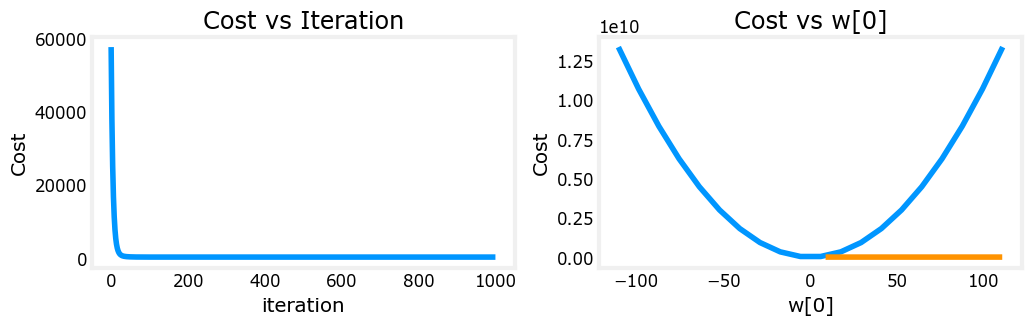

In [11]:
print('Unmromalized Data')
plot_cost_i_w(X_train,y_train,hist)

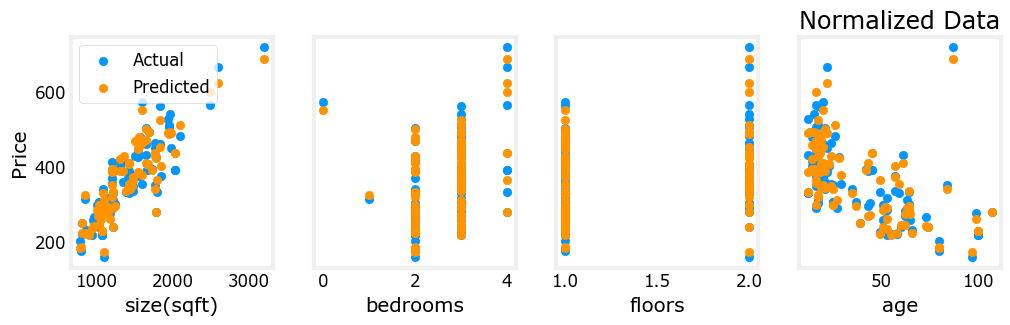

In [12]:
m = X_norm.shape[0]
y_pred = np.zeros(m)
for i in range(m):
    y_pred[i] = predict(X_norm[i], w_norm, b_norm)
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label='Actual')
    ax[i].scatter(X_train[:,i],y_pred, label='Predicted')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price"); ax[0].legend();
plt.title("Normalized Data")
plt.show()

In [14]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")


[-0.53  0.43 -0.79  0.06]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709


In [21]:
prange = [
    [111-50, 111+50, 75],
    [-16.75-50, -16.75+50, 75],
    [-28.5-8, -28.5+8, 50],
    [-37.1-16, -37.1+16, 50],
    [376-150, 376+150, 50]
]

w0_range = np.linspace((111-50), (111+50), 75)
w1_range = np.linspace((-16.75-50), (-16.75+50), 75)
W0, W1 = np.meshgrid(w0_range, w1_range)
Z = np.zeros_like(W0)

for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_test = w_norm.copy()
        w_test[0] = W0[i, j]
        w_test[1] = W1[i, j]
        Z[i, j] = compute_cost(X_norm, y_train, w_test, b_norm)

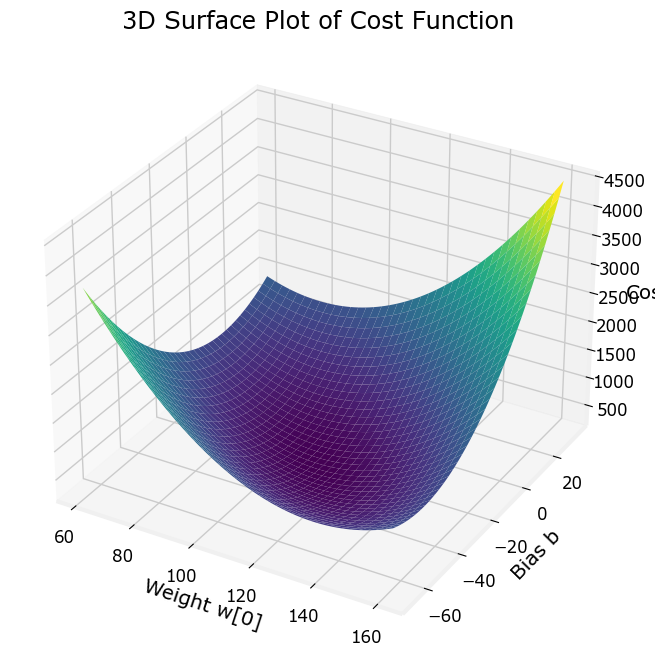

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, Z, cmap='viridis')
ax.set_xlabel('Weight w[0]')
ax.set_ylabel('Bias b')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of Cost Function')
plt.show()


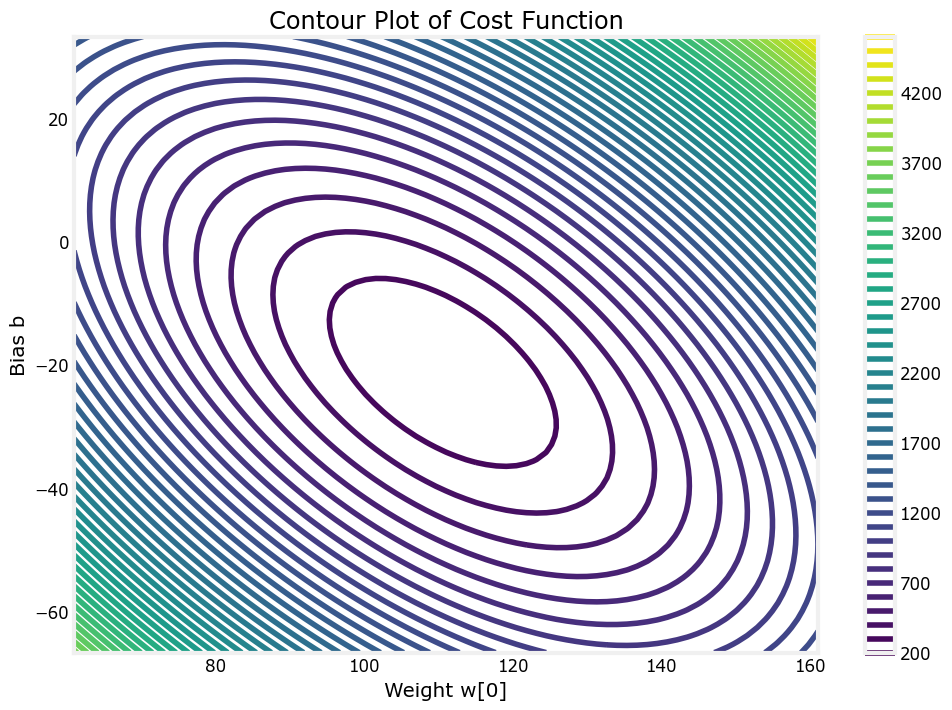

In [23]:
plt.figure(figsize=(12, 8))
cp = plt.contour(W0, W1, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.xlabel('Weight w[0]')
plt.ylabel('Bias b')
plt.title('Contour Plot of Cost Function')
plt.show()

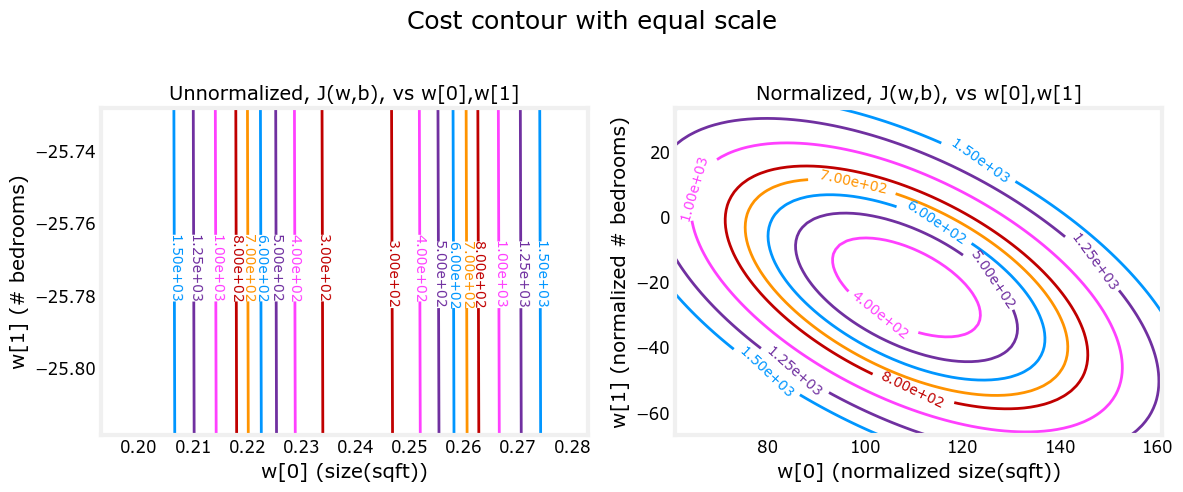

In [19]:
plt_equal_scale(X_train, X_norm, y_train)